<a href="https://colab.research.google.com/github/diptoromeo/LangChain-based-LLM-for-ChatGPT/blob/main/05_LangChain_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai
!pip install langchain
!pip install langchain_community langchain_core
!pip install tiktoken
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.6/987.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 5.6 MB/s eta 0:00:00


In [2]:
# Azure API Licence call for OpenAi embedding
import os

os.environ['OPENAI_API_KEY'] = '34fcaca1b0b04ebc935168215a7b44e8'
os.environ['OPENAI_API_TYPE'] = 'azure'
os.environ['AZURE_OPENAI_ENDPOINT'] = 'https://labuser01openai.openai.azure.com/'
os.environ['OPENAI_API_VERSION'] = '2023-05-15'

In [3]:
from langchain.embeddings import AzureOpenAIEmbeddings

embedding_model = AzureOpenAIEmbeddings(
    deployment_name='dev-text-embedding-ada-002'
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `AzureOpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import AzureOpenAIEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_community/embeddings/openai.py:272: UserWarning: WARNING! deployment_name is not default parameter.
                    deployment_name was transferred to model_kwargs.
                    Please confirm that deployment_name is what you intended.
  warnings.warn(


KeyError: 'openai_api_key'

# HuggingFace Embedding

In [4]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [5]:
from langchain.embeddings import HuggingFaceEmbeddings

model_name = 'BAAI/bge-small-en'
model_kwarge = {'device':'cpu'}
encode_kwarge = {'normalize_embeddings':True}

hf = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwarge,
    encode_kwargs=encode_kwarge
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
# 임베딩 안 내용을 임베딩으로 값으로 바꾼다.
embedding = hf.embed_documents(
    [
        'today is monday',
        'weather is nice day',
        'whats the problem',
        'langchain is useful',
        'HelloWorld!',
        'my name is dipto'
    ]
)

In [17]:
len(embedding[0])

384

In [18]:
BGE_query_q = hf.embed_query('Hello, who is this')
BGE_query_a = hf.embed_query('Hi, this is adalen')

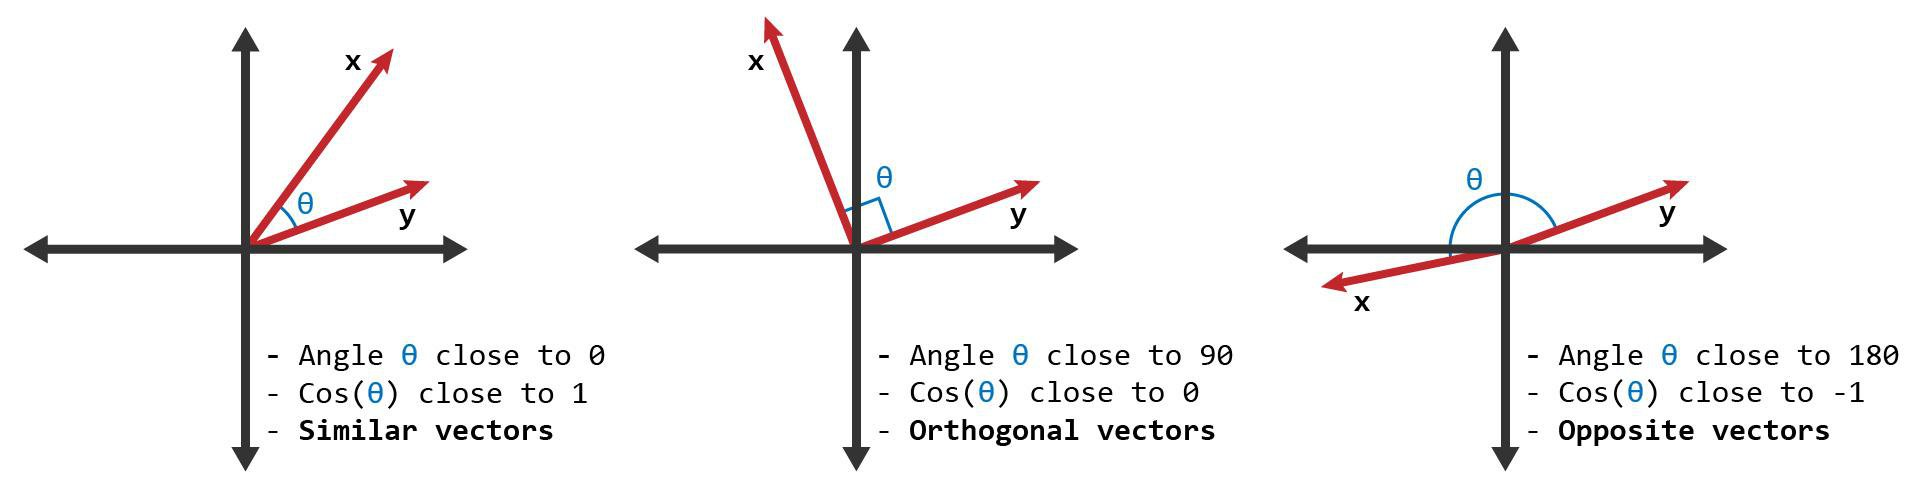

In [19]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [20]:
print(cos_sim(BGE_query_q, BGE_query_a))
print(cos_sim(BGE_query_q, embedding[1]))
print(cos_sim(BGE_query_q, embedding[4]))

0.8984699163490328
0.8299730889643965
0.8909999009530675


In [11]:
from langchain.embeddings import HuggingFaceEmbeddings

model_name = 'jhgan/ko-sbert-nli'
model_kwarge = {'device':'cpu'}
encode_kwarge = {'normalize_embeddings':True}

ko = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwarge,
    encode_kwargs=encode_kwarge
)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [26]:
sentence = [
        '안녕하세요',
        '제 이름은 홍길동입니다.',
        '이름이 무엇인가요?',
        '랭체인은 유용합니다.',
        '홍길동 아버지의 이름은 홍상직입니다'
]

ko_embeddings = ko.embed_documents(sentence)

In [27]:
q = '홍길동 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까?'
a = '홍길동 아버지는 엄했습니다.'

ko_query_q = ko.embed_query(q)
ko_query_a = ko.embed_query(a)


print('질문: {}\n'.format(q), '-'*100)
print('{} \t\t 문장 유사도'.format(a), round(cos_sim(ko_query_q, ko_query_a),2))
print('{} \t\t 문장 유사도'.format(sentence[1]), round(cos_sim(ko_query_q, ko_embeddings[1]),2))
print('{} \t\t 문장 유사도'.format(sentence[3]), round(cos_sim(ko_query_q, ko_embeddings[3]),2))
print('{} \t 문장 유사도'.format(sentence[4]), round(cos_sim(ko_query_q, ko_embeddings[4]),2))


질문: 홍길동 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까?
 ----------------------------------------------------------------------------------------------------
홍길동 아버지는 엄했습니다. 		 문장 유사도 0.51
제 이름은 홍길동입니다. 		 문장 유사도 0.57
랭체인은 유용합니다. 		 문장 유사도 0.07
홍길동 아버지의 이름은 홍상직입니다 	 문장 유사도 0.64


In [13]:
len(ko_query_q)

768

In [14]:
print(cos_sim(ko_query_q, ko_query_a))

0.5076704697768064
